In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from collections import defaultdict

iris=datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

In [104]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
np.random.seed(44)
indices = np.random.permutation(len(iris_data))
n_training_samples = 50
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]


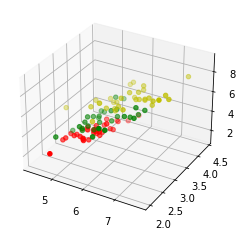

In [4]:
X=[]
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(trainset_data)):
        if trainset_labels[i] == iclass:
            X[iclass][0].append(trainset_data[i][0])
            X[iclass][1].append(trainset_data[i][1])
            X[iclass][2].append(sum(trainset_data[i][2:]))
            
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

                                
for iclass in range(3):
        ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()


In [5]:
def distance (instance1, instance2):
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)


In [6]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    distances=[]
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)


In [7]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]


In [8]:
correct_pred = defaultdict(int)
label_dict = defaultdict(int)
for i in range(n_training_samples):
    neighbors = get_neighbors(trainset_data, 
                              trainset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    label_dict[testset_labels[i]] += 1
    if vote(neighbors) == testset_labels[i]:
        correct_pred[testset_labels[i]] += 1
    print("index =", i,
         ", result of vote: ", vote(neighbors),
         ", label: ", testset_labels[i],
         ", data: ", testset_data[i])

index = 0 , result of vote:  0 , label:  0 , data:  [5.5 3.5 1.3 0.2]
index = 1 , result of vote:  0 , label:  0 , data:  [4.4 2.9 1.4 0.2]
index = 2 , result of vote:  0 , label:  0 , data:  [5.  3.3 1.4 0.2]
index = 3 , result of vote:  1 , label:  1 , data:  [6.3 3.3 4.7 1.6]
index = 4 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.7 1.2]
index = 5 , result of vote:  1 , label:  1 , data:  [5.6 3.  4.5 1.5]
index = 6 , result of vote:  0 , label:  0 , data:  [4.8 3.  1.4 0.3]
index = 7 , result of vote:  1 , label:  1 , data:  [6.6 3.  4.4 1.4]
index = 8 , result of vote:  0 , label:  0 , data:  [4.7 3.2 1.3 0.2]
index = 9 , result of vote:  0 , label:  0 , data:  [4.8 3.  1.4 0.1]
index = 10 , result of vote:  1 , label:  1 , data:  [6.1 2.9 4.7 1.4]
index = 11 , result of vote:  2 , label:  2 , data:  [6.4 3.1 5.5 1.8]
index = 12 , result of vote:  0 , label:  0 , data:  [4.7 3.2 1.6 0.2]
index = 13 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index = 14 , res

In [9]:
correct = 0
total = 0
for k,v in correct_pred.items():
    print(k,v)
    correct += v
    total += label_dict[k]
    print('The accuracy for iris type ',k,' is: ',(v/label_dict[k]))
print('THe overall accuracy of the model is: ', (correct/total))


0 13
The accuracy for iris type  0  is:  1.0
1 18
The accuracy for iris type  1  is:  0.9
2 17
The accuracy for iris type  2  is:  1.0
THe overall accuracy of the model is:  0.96
